<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-EvelynAylin/blob/main/A01748750_TecMty_kmeans_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresiones (clase), Kmeans y plan semanal


Alumno: Evelyn Aylin Rendon Medina

Matricula: A01748750

Profesora: María de la Paz Rico Fernández

Materia: Ciencia y Analítica de datos

Fecha de entrega: 9 de noviembre 2022

#Instrucciones
Código e instrucciones generales que contenía el cuaderno originalmente

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [ ]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [ ]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [ ]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

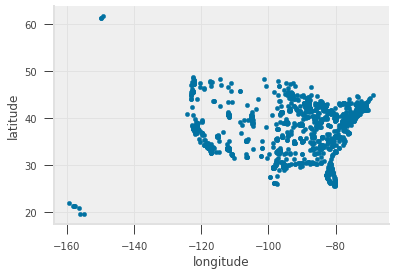

In [ ]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [ ]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [ ]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [ ]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [ ]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

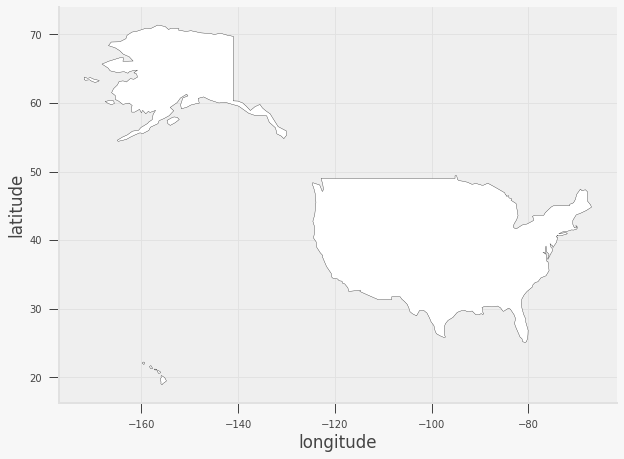

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

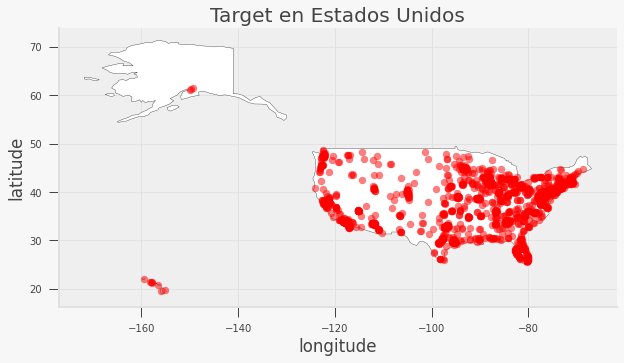

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

# Ejercicio

## Encontrando K óptimo

In [ ]:
#tu codigo aquí
#Importamos la librería de sklearn para traer a KMeans
from sklearn.cluster import KMeans

1 2 3 4 5 6 7 8 9 10 11 

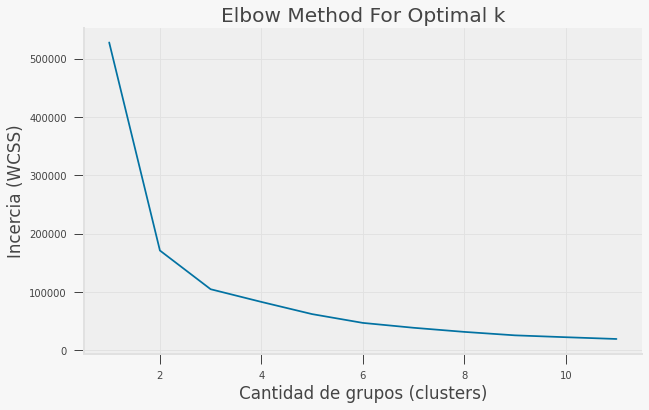

In [ ]:
#Vamos a determinar la cantidad de grupos (clusters) con base en el  
#método del codo, que nos ayuda a encontrar el valor óptimo para k

#Establecemos un rango de grupos
K = range(1,12)
#Creamos una lista para la suma del cuadrado de las distancias
sumaCuadradoDistancias=[]

#Creamos un bucle que recorra el rango de grupos
for k in K:
    print(k, end=' ')
    #Ajustamos el rango de grupos a nuestra variable de latitud y longitud
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(latlong)
    #.inertia_ nos computa la suma del cuadrado de las distancias
    sumaCuadradoDistancias.append(kmeans.inertia_) 

#Ajustamos el tamaño de la gráfica para una mejor visualización
plt.figure(figsize=(10, 6))
#Se genera la gráfica con el rango de grupos y su suma cuadrada de distancia
plt.plot(K, sumaCuadradoDistancias, 'bx-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Cantidad de grupos (clusters)')
plt.ylabel('Incercia (WCSS)')
plt.show()

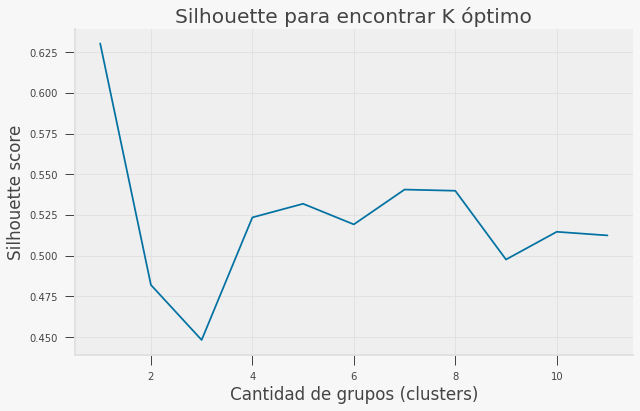

In [ ]:
from sklearn.metrics import silhouette_score
#El valor de la silueta mide qué tan similar es un punto a su propio grupo (cohesión) 
#en contraste con otros grupos (separación). Un valor alto indica el clúster correcto.
#Silhouette Score alcanza su máximo global en el k óptimo, lo que idealmente se vería
#como un pico en el gráfico de valores Silhouette contra k (cantidad de grupos/clusters)
sil=[]
kmax=12
#La disimilitud no se definiría para un solo grupo, por lo tanto, el número mínimo de grupos debe ser 2
for k in range(2, kmax+1):
  kmeans=KMeans(n_clusters=k).fit(latlong)
  labels=kmeans.labels_
  #Incoporar el resultado a una lista
  sil.append(silhouette_score(latlong, labels, metric='euclidean'))
#Personalización de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(K, sil, 'bx-')
plt.xlabel('Cantidad de grupos (clusters)')
plt.ylabel('Silhouette score')
plt.title('Silhouette para encontrar K óptimo')
plt.show()

Con base en las gráficas y el factor de decisión humano, se determina que el
decremento en la incercia a partir del grupo número 3 no es muy sustancial para la gráfica de codo. Por otro lado, también observamos el pico justamente en el mismo número para la gráfica Silhouette, por lo que será precisamente ese valor el que se empleará en el agrupamiento.

## Modelo

In [ ]:
#Creación del algoritmo K-means para modelar la cantidad de almacenes dada la latitud y longitud de las tiendas
kmeans = KMeans(n_clusters=3, random_state=1) #KMeans(n_clusters=7, random_state=1).fit(latlong)
y_kmeans = kmeans.fit_predict(latlong) #y_pred = kmeans.fit_predict(X)

In [ ]:
#Observamos los centros de los grupos que el modelo nos ha generado
centros=kmeans.cluster_centers_
for i in range(1,4):
  print('Grupo',i,'Centro:',centros[i-1][0].round(2),'latitud,',centros[i-1][1].round(2),'longitud')

Grupo 1 Centro: 37.98 latitud, -93.33 longitud
Grupo 2 Centro: 37.79 latitud, -78.57 longitud
Grupo 3 Centro: 37.49 latitud, -118.62 longitud


In [ ]:
#Con base en las predicciones de los centros para cada grupo (almacenes),
#obtenemos la cantidad de tiendas qus surtiría cada almacén, es decir,
#la cantidad de puntos o datos que contiene cada grupo
clusterCount=np.bincount(y_kmeans) #np.bincount(kmeans.labels_)
for i in range(1,4):
  print('Almacén',i,', tiendas en su radio:',clusterCount[i-1])

Almacén 1 , tiendas en su radio: 628
Almacén 2 , tiendas en su radio: 826
Almacén 3 , tiendas en su radio: 385


## Cálculo distancias

In [ ]:
#Creamos una función para calcular la distancia del centro con los puntos
def calculoDistancia(centro,X,Y):
  #Creamos una lista vacía para añadir los resultados
  distancias=[]

  cx, cy=centro
#Iteramos en los puntos para calcular la distancia con base en la fórmula ya establecida
  for x,y in list(zip(X,Y)):
    difX=(x-cx)**2
    difY=(y-cy)**2
    distancia=np.sqrt(difX+difY)
    #Añadimos los resultados a una lsita
    distancias.append(distancia)

#Regresamos los valores obtenidos
  return distancias

In [ ]:
#Creamos las variables c0:c5 correspondientes a la ubicación de cada centro
#También se les asignan los valores de latitud y longitud a cada uno

#Se comienza en cero para evitar un problema con los índices de Python
for i in range(0,3):
  exec("c" + str(i) + '=kmeans.cluster_centers_[i]')

In [ ]:
#Calculamos la distancia de cada centro (relativo a cada grupo) para cada tienda
#Añadimos el resultado como una columna al dataframe original
df['C1_Distancia']=calculoDistancia(c0, df['latitude'],df['longitude'])
df['C2_Distancia']=calculoDistancia(c1, df['latitude'],df['longitude'])
df['C3_Distancia']=calculoDistancia(c2, df['latitude'],df['longitude'])

In [ ]:
#Obtenemos los índices de las columnas respecto a las distancias del 
#primer y último centro, siendo asignados dentro de una variable
idx_c1=df.columns.get_loc('C1_Distancia')
idx_c3=df.columns.get_loc('C3_Distancia')

#Obtenemos la distancia mínima a su centro para cada punto (tienda)
#Dicho valor se anexa en el dataframe original como una nueva columna
df['Cluster']=df.iloc[:,idx_c1:idx_c3+1].min(axis=1)

In [ ]:
#Observamos todos los cambios
df.head(4)

,name,latitude,longitude,address,phone,website,Coordinates,C1_Distancia,C2_Distancia,C3_Distancia,Cluster
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),8.072639,9.415166,32.104605,8.072639
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),7.857694,9.525821,31.906107,7.857694
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),9.160856,11.773830,31.490303,9.160856
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),7.217315,9.000934,31.787976,7.217315


In [ ]:
#Observamos la longitud y latitud exacta para cada centro (almacén)
for i in range(1,4):
  print('Centro',i,centros[i-1][0],'latitud,',centros[i-1][1],'longitud')

Centro 1 37.98006260590112 latitud, -93.32717230430622 longitud
Centro 2 37.789554004474006 latitud, -78.56990807484885 longitud
Centro 3 37.48734203064935 latitud, -118.62447331844157 longitud


In [ ]:
#Importamos la librería que no brindará la ubicación de los centros, basado en la latitud y longitud
from geopy.geocoders import Nominatim

#Creamos listas que contienen la latitud y longitud de cada centro, respectivamente
Latitudes=['37.98006261','37.789554','37.48734203']
Longitudes=['-93.3271723','-78.56990807','-118.62447332']
#Declaramos nuestro geolocalizador
geolocator = Nominatim(user_agent="geoapiExercises")

#Obtenemos la ubicación de cada almacén o centro
for i in range(len(centros)):
  location = geolocator.reverse(Latitudes[i] +","+Longitudes[i]) 
  print('Ubicación almacén',i+1,':',location)

Ubicación almacén 1 : Hickory County, Missouri, United States
Ubicación almacén 2 : Langhorne Road, Totier Hills, Albemarle County, Virginia, 22946, United States
Ubicación almacén 3 : Paradise Estates, Mono County, California, United States


## Visualización

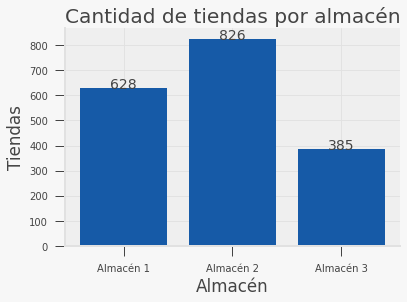

In [ ]:
almacenes=['Almacén 1','Almacén 2','Almacén 3']
plt.bar(almacenes,clusterCount)
plt.xlabel('Almacén')
plt.ylabel('Tiendas')
plt.title('Cantidad de tiendas por almacén')
for i in range(len(clusterCount)):
        plt.text(i, clusterCount[i], clusterCount[i], ha = 'center')

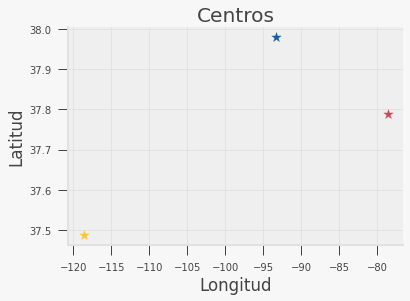

In [ ]:
#Creamos una lista que contiene todas las variables correspondientes a los centros
varsCentros=[c0,c1,c2]

#Recorremos la lista anterior para graficar los centros en función de la longitud y latitud
for i in range(0,3):
  plt.scatter(varsCentros[i][1], varsCentros[i][0],marker='*',s=100)
  plt.ylabel('Latitud')
  plt.xlabel('Longitud')
  plt.title('Centros')

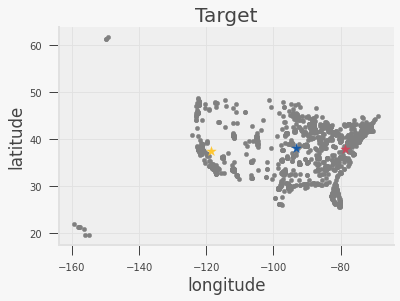

In [ ]:
#Usamos la gráfica scatter de explicación para observar el traslape de los centros
#en función de los puntos. Es decir, los almacenes conforme las tiendas en la zona
latlong.plot.scatter("longitude","latitude",c='gray')
plt.title('Target')
for i in range(0,3):
  plt.scatter(varsCentros[i][1], varsCentros[i][0],marker='*',s=100)

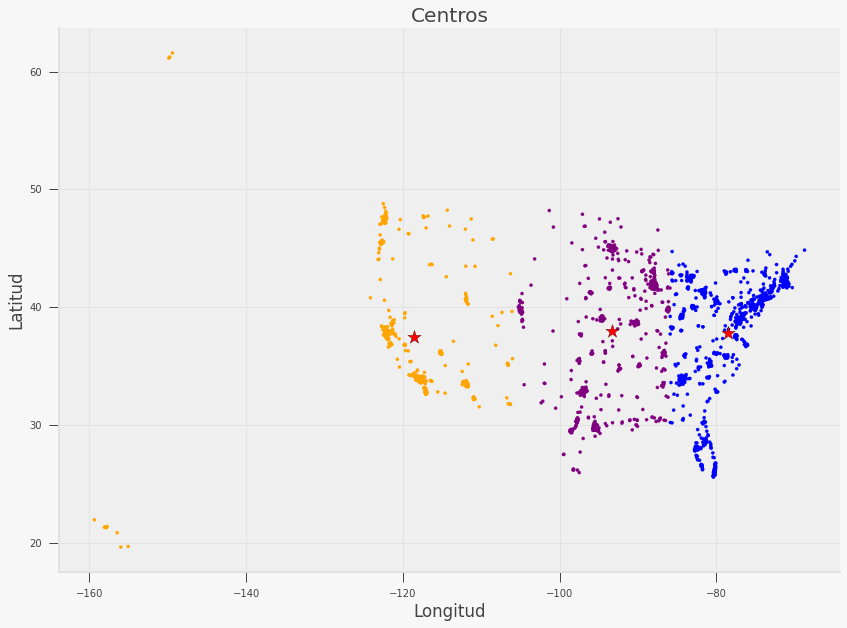

In [ ]:
#Ahora vamos a crear la misma gráfica anterior, mas aplicando colores distintos
#a los grupos que hemos segmentado con kmeans
#Creamos una lista con los colores y otra vacía para asignarlos
colores=['purple','blue','orange']
asignar=[]
#Recorremos las predicciones que generó el modelo
for row in y_kmeans:
     asignar.append(colores[row])
#Graficamos los puntos
latlong.plot.scatter("longitude","latitude", c=asignar, s=10, figsize = (14,10))
#Graficamos los centros
plt.scatter(centros[:, 1], centros[:, 0], marker='*', c='red',edgecolor='black', s=200)
plt.ylabel('Latitud')
plt.xlabel('Longitud')
plt.title('Centros')
plt.show()

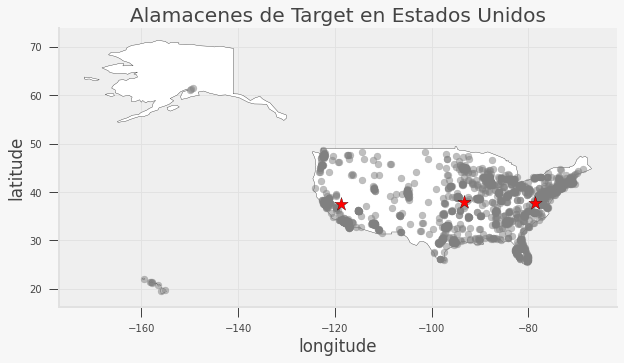

In [ ]:
#Sin embargo, justo como se revisó el comparativo en la explicación, empleando la librería para graficar datos geográficos
#es posible apreciar mejor el contenido, por lo que sea crea la misma gráfica anterior, pero con una mejor visualización

#Gráfico de las tiendas en el mapa
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')
gdf.plot(ax=gax, color='gray', alpha = 0.5)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Alamacenes de Target en Estados Unidos')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

#Gráfico de los centros de los grupo (almacenes) en el mapa con las tiendas (puntos)
for i in range(0,3):
  gax.scatter(varsCentros[i][1], varsCentros[i][0],marker='*',s=200,edgecolor='black',color='red')
plt.show()

# Preguntas

**Encuentra el numero ideal de almacenes, justifica tu respuesta:**

Recordemos que K means nos ayuda a resolver problemas de optimización, específicamente se busca minimizar la suma de distancias entre cada dato y su centro (relativo a su grupo), por lo que seleccionar la cantidad ideal de almacenes, implicaba precisamente eso, optimización. Sin embargo, para determinar ese número de grupos, que equivaldrían a almacenes no hay una receta definitiva, sino algunas herramientas que nos pueden ayudar a combinar el factor de decisión humano con los algoritmos. En este caso decidí emplear el método del codo para determinar el número de grupos, que fue 3, donde ya no había una disminución muy significativa de la inercia, que es en lo que consiste el método. Como apoyo también empleé la gráfica silhouette, donde el valor de la silueta mide qué tan similar es un punto a su propio grupo (cohesión) en contraste con otros grupos (separación). Un valor alto indica el clúster correcto, lo que idealmente se vería como un pico en el gráfico de valores Silhouette contra k (cantidad de grupos/clusters) y dicho pico se observó en 3 grupos. Por tanto, con la verificación de ambos métodos pude determinar el número ideal de almacenes, que equivale a la cantidad centros para cada grupo.

**Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va a surtir?, ¿sabes a que distancia estará?**

El cálculo de las distancias se realiza en un apartado individual dentro del desarrollo de la actividad, donde se obtiene la distancia de cada punto (tienda) hacia los centros y se determina su grupo, que es el que está más cerca (menor distancia), tal información de hecho se incorpora como columnas en el dataframe original. De igual forma, en el mismo apartado y basado en la longitud y latitud, se obtiene la ubicación de los almacenes, como también se obtiene la cantidad de tiendas a surtir con un conteo generado por numpy. 

**¿a cuantas tiendas va a surtir?**

- Almacén 1 , tiendas en su radio: 628
- Almacén 2 , tiendas en su radio: 826
- Almacén 3 , tiendas en su radio: 385

**¿qué ciudad es?**
- Ubicación almacén 1 : Hickory County, Missouri, United States
- Ubicación almacén 2 : Langhorne Road, Totier Hills, Albemarle County, Virginia, 22946, United States
- Ubicación almacén 3 : Paradise Estates, Mono County, California, United States

**Encuentra las latitudes y longitudes de los almacenes**
- Grupo 1 Centro: 37.98 latitud, -93.33 longitud
- Grupo 2 Centro: 37.79 latitud, -78.57 longitud
- Grupo 3 Centro: 37.49 latitud, -118.62 longitud

**¿sabes a que distancia estará?**

Este procedimiento es realizado y anexado para cada tienda en el dataframe, obteniendo su almacén. Por ejemplo, la tienda
Alabaster (33.224225	-86.804174)	tiene una distancia de 8.072638.072639° a su centro

**¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente**

Como menciono anteriormente, elegí la cantidad de almacenes basándome en la teórica disponible para el método de K-means, donde seleccioné el de codo y Silhouette para determinar el número de grupos. Se eligieron específicamente 3 para poder cubrir las zonas donde había tiendas separadas por mar del conjunto con mayor concentración, además es un punto donde la inercia ya no disminuye significativamente o se encuentra el pico, es decir, basándome en los criterios teóricos de cada gráfica.

**¿qué librerías nos pueden ayudar a graficar este tipo de datos?**
1.	Cartopy. Dicha librería fue diseñada para procesar datos geospacioales, con lo que es posible generar mapas y otro análisis. Emplea otras librerías , que son PROJ, NumPy y Shapely, además incorpora una interfaz construida sobre Matplotlib.
2.	Folium. Basada en una librería disponible para JavaScript (Leaflet), nos permite manipular y visualizar datos en mapas, es decir, observamos todas nuestras transformaciones en Leaflet.
3.	GeoPandas. Es una extensión de la muy conocida librería de pandas, mas incorpora la posibilidad de trabajar con datos geoespaciales. Es de código abierto y también es posible emplear vectores.
4.	Geopy. Esta librería permite localizar las coordenadas de direcciones, ciudades, países y puntos de referencia.
5.	PySAL. Con esta librería es posible obtener análisis espaciales y visualizaciones, por ejemplo, mapas de calor en sobre datos geográficos.

Considero que conocer librerías como las enunciadas y además aprender a utilizarlas siempre es útil. Si bien quizá no podemos dominarlas todas, optar por una o dos que se complementen nos ayudará a crear códigos más robustos y a presentar la información de manera más accesible pues, precisamente como se comentaba en clase, muchas veces debemos exponer nuestros resultados a personas que no dominan el tema, por lo que deben ser presentados de la forma más sencilla posible y combinar (sabiendo usarlas) diversas visualizaciones puede ser una manera viable para lograrlo.

**¿Consideras importante que se grafique en un mapa?, ¿por qué?**

Es útil que se grafique en un mapa porque nos hace más sentido como seres humanos, pues la visualización es más especifica y adquiere mayor significancia e interpretabilidad, por lo que, si bien no es absolutamente necesario, sí puede ser un factor importante que considerar en casos donde se estén trabajando ubicaciones geográficas. Un ejemplo análogo de lo anterior sería hacer matemáticas con palabras en lugar de números, es posible y se entiende, pero para eso tenemos los dígitos, para que el proceso sea más sencillo e intuitivo.  

**Agrega las conclusiones**

Esta actividad fue un poco más difícil de llevar a cabo, ya que no se contaba con el desarrollo de un ejemplo similar, mas el trasfondo de cómo se manejan las cosas a nivel código fue de ayuda, sobre todo en el sentido del ajuste y predicción con el objeto creado, en este caso, correspondiente al modelo K-means. Me refiero a que se procesa de manera similar a los modelos trabajados anteriormente, por ejemplo, por lo que, si bien no se revisó de forma específica, al menos generar las predicciones en cuanto a los grupos no fue complejo. Por otro lado, respecto a la implementación y el ejemplo de uso, si bien fue evidente que se trabajó con un problema de minimización, el caso práctico en que se solicitó me permitió develar el gran potencial del modelo, desde los atributos que nos ofrece la librería específica de sklearn hasta la aplicación en distintos ámbitos, generado con cualquier herramienta (no solo trabajado desde Python). En sí me ayudó a entender mejor cómo o porqué emplearíamos esta técnica de aprendizaje no supervisado y también cómo llevarla a cabo o proponer soluciones, por el método del codo y Silhouette que seleccioné particularmente , cómo calcular las distancias, cómo observar los grupos y los centros generados por el modelo, cómo obtener ubicaciones a partir de la latitud y longitud, entre otros. En sí, fue una gran introducción no solo al modelo de K-means, sino también a los datos geográficos. 

# Referencias

- Sham K., (2020, Junio), Find the best customer service centre location by using K-means clustering, medium, Recuperado en noviembre 2022 de https://medium.com/analytics-vidhya/find-the-best-customer-service-centre-location-by-using-k-means-clustering-fcc05eb7ab0f
- Muzhingi I., (2020, Julio), K-Means clustering made simple, Recuperado en noviembre 2022 de https://www.blopig.com/blog/2020/07/k-means-clustering-made-simple/
- Gliese, (2019, Julio), Ejemplo de clustering con k-means en Python, Exponentis, Recuperado en noviembre 2022 de http://exponentis.es/ejemplo-de-clustering-con-k-means-en-python
- Morales A., 15 librerías de Python para GIS, mappingGIS, Recuperado en noviembre 2022 de https://mappinggis.com/2022/04/15-librerias-de-python-para-gis/
- Mahendry K., (2017, Junio), How to Determine the Optimal K for K-Means?, Medium, Recuperado en noviembre 2022 de https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
- S.A., OBTENGA LOS NOMBRES DE LA CIUDAD, EL ESTADO Y EL PAÍS A PARTIR DE LA LATITUD Y LA LONGITUD CON PYTHON, Acervo Lima, Recuperado en noviembre 2022 de https://es.acervolima.com/obtenga-los-nombres-de-la-ciudad-el-estado-y-el-pais-a-partir-de-la-latitud-y-la-longitud-con-python/
- Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc."
VanderPlas, J.  Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc."
